<a href="https://colab.research.google.com/github/johnOliveiraLima/clima_change/blob/main/Agro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Base da dados do impacto do clima na agricultura

## Leitura dos dados com Pandas

In [ ]:
path = '/content/drive/MyDrive/Coder/climate_change_impact_on_agriculture_2024.csv'

In [ ]:
df = pd.read_csv(path)

Tamanho do dataframe

# Descrições das Variáveis

| **Variável**                           | **Descrição**                                                                                                 |
|----------------------------------------|---------------------------------------------------------------------------------------------------------------|
| **Year**                               | O ano em que os dados foram coletados ou analisados.                                                         |
| **Country**                            | O nome do país onde os dados se referem.                                                                      |
| **Region**                             | A região geográfica em que o país está localizado.                                                           |
| **Crop_Type**                          | O tipo de cultura ou plantação que está sendo analisada.                                                     |
| **Average_Temperature_C**             | A temperatura média (em graus Celsius) durante o período de cultivo.                                         |
| **Total_Precipitation_mm**             | A quantidade total de precipitação (chuva) recebida, medida em milímetros.                                  |
| **CO2_Emissions_MT**                  | A quantidade total de emissões de dióxido de carbono (CO₂) geradas, medida em milhões de toneladas (MT).    |
| **Crop_Yield_MT_per_HA**              | A produtividade das culturas, medida em toneladas por hectare (HA).                                          |
| **Extreme_Weather_Events**            | Eventos climáticos extremos que ocorreram durante o período analisado.                                       |
| **Irrigation_Access_%**               | A porcentagem da área cultivada que tem acesso à irrigação.                                                  |
| **Pesticide_Use_KG_per_HA**           | A quantidade de pesticidas utilizada por hectare, medida em quilogramas.                                     |
| **Fertilizer_Use_KG_per_HA**          | A quantidade de fertilizantes utilizada por hectare, medida em quilogramas.                                   |
| **Soil_Health_Index**                  | Um índice que representa a saúde do solo.                                                                     |
| **Adaptation_Strategies**             | Estratégias adotadas para se adaptar a mudanças climáticas.                                                  |
| **Economic_Impact_Million_USD**       | O impacto econômico estimado em milhões de dólares americanos.                                               |


# Descrições das Variáveis



# Análise dos dados

In [ ]:
df.shape

(10000, 15)

**A minha base conta com 10 mil linhas, ou seja, 10 mil registros de impactos da temperatura na agricultura, representados pelas 15 colunas, que representam suas variáveis**

In [ ]:
df.head(5)

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 13  Adaptation_Strate

A usar a função info() podemos chegar a algumas conclusões:
  * Não há valores núlos em nehumas das minhas colunas.
  * Aparentemente todos os dados estão com o seu tipo correto.

# Considerações sobre os dados

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,10000.0,2007.088700,10.084245,1990.00,1999.0000,2007.000,2016.0000,2024.00
Average_Temperature_C,10000.0,15.241299,11.466955,-4.99,5.4300,15.175,25.3400,35.00
Total_Precipitation_mm,10000.0,1611.663834,805.016815,200.15,925.6975,1611.160,2306.9975,2999.67
CO2_Emissions_MT,10000.0,15.246608,8.589423,0.50,7.7600,15.200,22.8200,30.00
Crop_Yield_MT_per_HA,10000.0,2.240017,0.998342,0.45,1.4490,2.170,2.9300,5.00
Extreme_Weather_Events,10000.0,4.980900,3.165808,0.00,2.0000,5.000,8.0000,10.00
Irrigation_Access_%,10000.0,55.248332,25.988305,10.01,32.6775,55.175,77.5825,99.99
Pesticide_Use_KG_per_HA,10000.0,24.955735,14.490962,0.00,12.5275,24.930,37.4700,49.99
Fertilizer_Use_KG_per_HA,10000.0,49.973708,28.711027,0.01,25.3900,49.635,74.8250,99.99
Soil_Health_Index,10000.0,64.901278,20.195882,30.00,47.2350,64.650,82.4725,100.00


## Temperatura Médoa em C (Average_Temperature_C)

Minha procipitação total teve umm desvio padrão

In [ ]:
px.box(df['Average_Temperature_C'])

Não outliers na minha variável Average_Temperature_C, a minha média e a minha mediana tem valores bem próximos, então a minha distribuição é praticamente simétrica

## Total de Precipitações em MM (Total_Precipitation_mm)

Minha preciitação total tem um valor na méida muito parecido com a mediana. Porém temos um desvio padrão bem alto.

In [ ]:
px.box(df['Total_Precipitation_mm'])

In [ ]:
df.loc[df['Total_Precipitation_mm'] < 500, 'Crop_Yield_MT_per_HA'].mean()

2.117155053974485

In [ ]:
precipitacao_media_ano = df.groupby('Year')['Total_Precipitation_mm'].mean().reset_index()

In [ ]:
import plotly.express as px

# Calculando a precipitação média por ano
precipitacao_media_ano = df.groupby('Year')['Total_Precipitation_mm'].mean().reset_index()

# Calculando a produtividade média por ano
produtividade_media_ano = df.groupby('Year')['Crop_Yield_MT_per_HA'].mean().reset_index()

# Mesclando as duas médias em um único DataFrame
df_merged = precipitacao_media_ano.merge(produtividade_media_ano, on='Year')

# Criando o gráfico de dispersão
fig = px.scatter(df_merged,
                 x='Total_Precipitation_mm',
                 y='Crop_Yield_MT_per_HA',
                 title='Relação entre Precipitação e Produtividade Agrícola',
                 labels={'Total_Precipitation_mm': 'Precipitação Média (mm)',
                         'Crop_Yield_MT_per_HA': 'Produtividade Agrícola (MT/HA)'},
                 trendline='ols')  # Linha de tendência opcional

# Exibindo o gráfico
fig.show()


In [ ]:
df.describe(include = [object])

,Country,Region,Crop_Type,Adaptation_Strategies
count,10000,10000,10000,10000
unique,10,34,10,5
top,USA,South,Wheat,Water Management
freq,1032,754,1047,2049


# Perguntas:
1 - Qual o país com o maior impcto econômico

2 - Qual o país com o pior impcto econômico

3 - Quantidade de pesticida e fertilizantes gastos em cada uma dessas situações

4 - Qual a saíde do solo do melhor e pior imapcto econômico

5 - A quantidade de emissão de CO2 nesses casos

6 - País que mais emitiu e que menos emitíu


In [ ]:
# País com o maior impacto econômico em dolares
df.groupby('Country')['Economic_Impact_Million_USD'].sum().sort_values(ascending = False).head(1)

,Economic_Impact_Million_USD
Country,
Nigeria,719560.3


In [ ]:
# País com o pior impacto econômico em dolares
df.groupby('Country')['Economic_Impact_Million_USD'].sum().sort_values(ascending = True).head(1)

,Economic_Impact_Million_USD
Country,
Brazil,637327.76


In [ ]:
# 3 - Quantidade de pesticida e fertilizantes gastos em cada uma dessas situações
df.loc[df['Country'] == 'Nigeria', ['Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA']].sum()

,0
Pesticide_Use_KG_per_HA,25904.08
Fertilizer_Use_KG_per_HA,50116.06


In [ ]:
# 3 - Quantidade de pesticida e fertilizantes gastos em cada uma dessas situações
df.loc[df['Country'] == 'Brazil', ['Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA']].sum()

,0
Pesticide_Use_KG_per_HA,23339.61
Fertilizer_Use_KG_per_HA,46978.10


In [ ]:
# 4 - Qual a saíde do solo do melhor e pior imapcto econômico
pior_impacto = df.groupby('Country')['Economic_Impact_Million_USD'].sum().idxmin()
saude_solo_pi = df.loc[df["Country"] == pior_impacto, "Soil_Health_Index"].mean()
print(f'A saúdo do solo da(o) {pior_impacto} é em média de {round(saude_solo_pi,2)}%')

A saúdo do solo da(o) Brazil é em média de 65.27%


In [ ]:
# 4 - Qual a saíde do solo do melhor e pior imapcto econômico
melhor_impacto = df.groupby('Country')['Economic_Impact_Million_USD'].sum().idxmax()
saude_solo_mi = df.loc[df["Country"] == melhor_impacto, "Soil_Health_Index"].mean()
print(f'A saúdo do solo da(o) {melhor_impacto} é em média de {round(saude_solo_mi,2)}%')

A saúdo do solo da(o) Nigeria é em média de 64.36%


In [ ]:
# 5 - A quantidade de emissão de CO2 nesses casos
emissao_pi = df.loc[df['Country'] == pior_impacto, 'CO2_Emissions_MT'].sum()
emissao_mi = df.loc[df['Country'] == melhor_impacto, 'CO2_Emissions_MT'].sum()
print(f'A emissão de CO2 do(a) {pior_impacto} é de {emissao_pi} MT')
print(f'A emissão de CO2 do(a) {melhor_impacto} é de {emissao_mi} MT')

A emissão de CO2 do(a) Brazil é de 14179.25 MT
A emissão de CO2 do(a) Nigeria é de 15328.57 MT


In [ ]:
# 6 - País que mais emitiu CO2
df.groupby('Country')['CO2_Emissions_MT'].sum().sort_values(ascending = False).head(1)

,CO2_Emissions_MT
Country,
Australia,15889.61


In [ ]:
# 6 - País que menos emitiu CO2
df.groupby('Country')['CO2_Emissions_MT'].sum().sort_values(ascending = True).head(1)

,CO2_Emissions_MT
Country,
Brazil,14179.25


In [ ]:
df_brazil= df.loc[df['Country'] == pior_impacto]
df_brazil.groupby('Crop_Type')['Crop_Type'].count().sort_values(ascending = False)

,Crop_Type
Crop_Type,
Wheat,118
Corn,111
Cotton,110
Fruits,93
Vegetables,92
Sugarcane,91
Rice,89
Soybeans,88
Coffee,83


In [ ]:
df_nigeria= df.loc[df['Country'] == melhor_impacto]
df_nigeria.groupby('Crop_Type')['Crop_Type'].count().sort_values(ascending = False)

,Crop_Type
Crop_Type,
Sugarcane,122
Rice,112
Corn,111
Cotton,107
Soybeans,107
Barley,103
Wheat,103
Vegetables,94
Coffee,86


In [ ]:
# Metodo de adaptação dos paises
df_nigeria.groupby('Adaptation_Strategies')['Adaptation_Strategies'].count().sort_values(ascending = False)

,Adaptation_Strategies
Adaptation_Strategies,
No Adaptation,225
Organic Farming,210
Water Management,204
Crop Rotation,203
Drought-resistant Crops,187


In [ ]:
df_brazil.groupby('Adaptation_Strategies')['Adaptation_Strategies'].count().sort_values(ascending = False)

,Adaptation_Strategies
Adaptation_Strategies,
Water Management,209
Drought-resistant Crops,190
No Adaptation,190
Crop Rotation,178
Organic Farming,177


In [ ]:
# As culturas mais usadas no mundo
df['Crop_Type'].value_counts().sort_values(ascending = False)

,count
Crop_Type,
Wheat,1047
Cotton,1044
Vegetables,1036
Corn,1022
Rice,1022
Sugarcane,995
Fruits,979
Soybeans,958
Barley,952


In [ ]:
# Culturas com o maior impacto economico
df.groupby('Crop_Type')['Economic_Impact_Million_USD'].sum().sort_values(ascending = False)

,Economic_Impact_Million_USD
Crop_Type,
Wheat,714980.66
Sugarcane,695066.23
Rice,688147.48
Corn,681386.06
Cotton,680097.36
Vegetables,678317.80
Fruits,671821.62
Barley,652043.09
Coffee,645437.88


In [ ]:
# Cultura que tem o maior impacto médio
df.groupby('Crop_Type')['Economic_Impact_Million_USD'].mean().sort_values(ascending = False)

,Economic_Impact_Million_USD
Crop_Type,
Sugarcane,698.559025
Fruits,686.232503
Barley,684.919212
Coffee,683.003048
Wheat,682.885062
Rice,673.334129
Corn,666.718258
Soybeans,663.255115
Vegetables,654.746911


In [ ]:
# Maior produtor de cana de açucar
df.loc[df['Crop_Type'] == 'Sugarcane', 'Country'].value_counts().sort_values(ascending = False)

,count
Country,
Nigeria,122
India,109
China,109
Argentina,106
Australia,100
USA,99
Russia,97
Brazil,91
Canada,82


In [ ]:
# Maior produtor de algodão
df.loc[df['Crop_Type'] == 'Cotton', 'Country'].value_counts().sort_values(ascending = False)

,count
Country,
Australia,124
China,113
Brazil,110
Nigeria,107
Canada,103
India,103
USA,101
France,101
Russia,92


In [ ]:
df.columns

Index(['Year', 'Country', 'Region', 'Crop_Type', 'Average_Temperature_C',
       'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
       'Extreme_Weather_Events', 'Irrigation_Access_%',
       'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
       'Soil_Health_Index', 'Adaptation_Strategies',
       'Economic_Impact_Million_USD'],
      dtype='object')

In [ ]:
# Número de eventos com o clima extremo no Brasil
df.loc[df['Country'] == 'Brazil', 'Extreme_Weather_Events'].sum()

4746

In [ ]:
# Número de eventos com clima extremo na Nigéria
df.loc[df['Country'] == 'Nigeria', 'Extreme_Weather_Events'].sum()

5216

## Gráfico de barras

In [ ]:
px.bar(df['Country'])

## Histograma

<Axes: xlabel='Economic_Impact_Million_USD', ylabel='Count'>

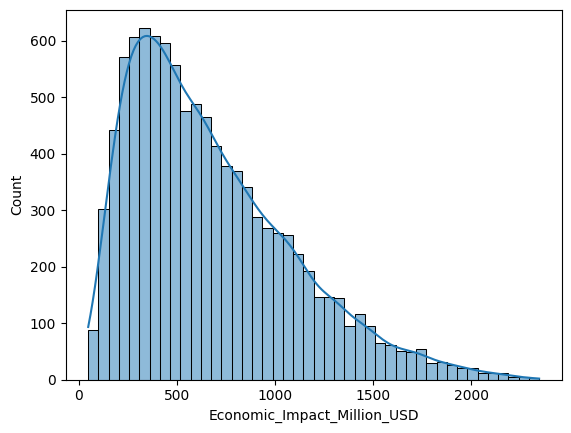

In [ ]:
sns.histplot(df["Economic_Impact_Million_USD"], kde = True)

## Boxplots

In [ ]:
df.columns

Index(['Year', 'Country', 'Region', 'Crop_Type', 'Average_Temperature_C',
       'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
       'Extreme_Weather_Events', 'Irrigation_Access_%',
       'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
       'Soil_Health_Index', 'Adaptation_Strategies',
       'Economic_Impact_Million_USD'],
      dtype='object')

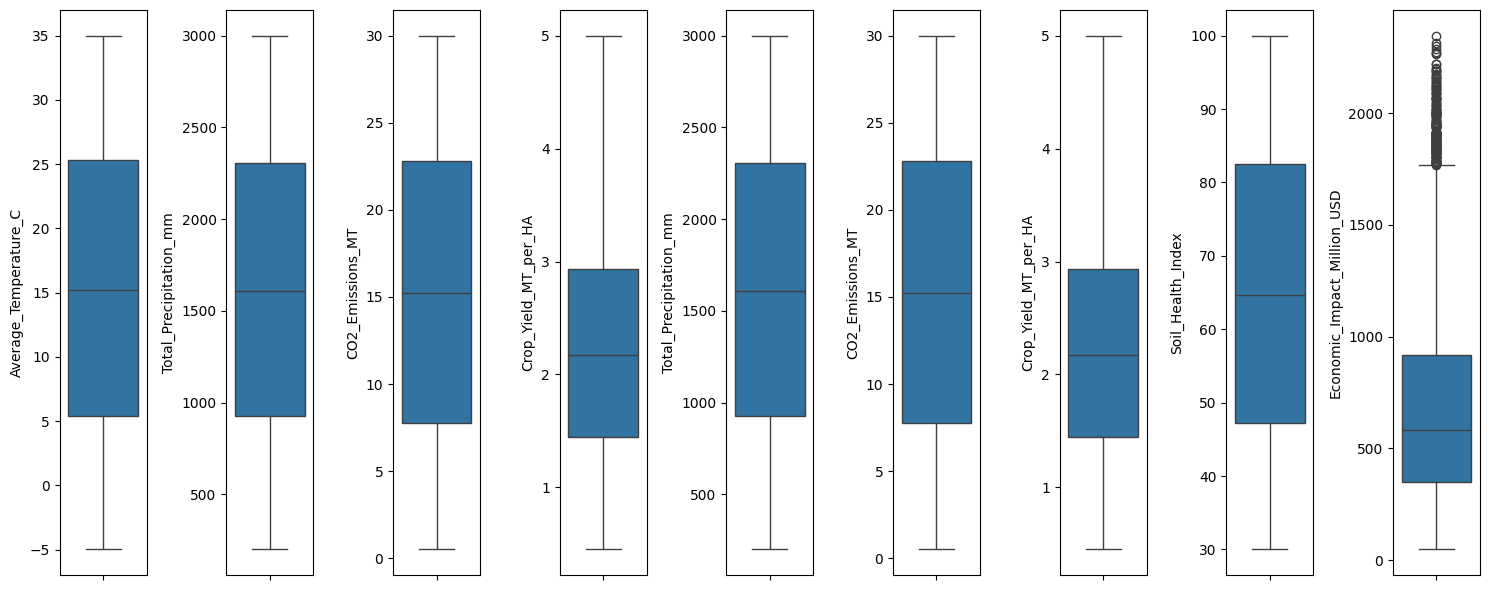

In [ ]:
variaveis = ['Average_Temperature_C','Total_Precipitation_mm',
             'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
             'Total_Precipitation_mm', 'CO2_Emissions_MT',
             'Crop_Yield_MT_per_HA','Soil_Health_Index',
             'Economic_Impact_Million_USD']

fig, axes = plt.subplots(1, len(variaveis), figsize=(15,6))

for ax, variable in zip(axes, variaveis):
    ax = sns.boxplot( y=variable, data=df, ax = ax)
plt.tight_layout()

## Correlação das variáveis

<Axes: >

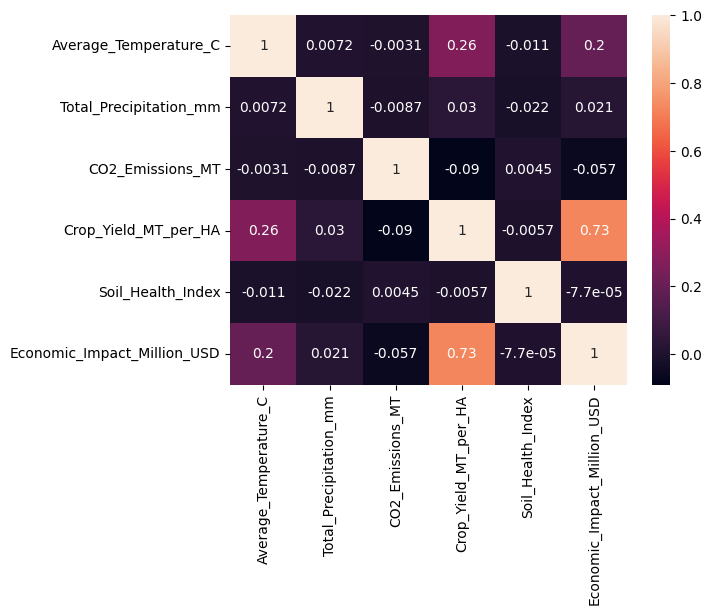

In [ ]:
# Correação
variables = ['Average_Temperature_C',
             'Total_Precipitation_mm',
             'CO2_Emissions_MT',
             'Crop_Yield_MT_per_HA',
             'Soil_Health_Index',
             'Economic_Impact_Million_USD']
sns.heatmap(df[variables].corr(), annot = True)

## Relatório usando profinling

In [ ]:
# %pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
# from pandas_profiling import ProfileReport

In [ ]:
# relatorio = ProfileReport(df)

In [ ]:
# relatorio.to_widgets()

In [ ]:
# relatorio.to_file("relatorio.html")

In [ ]:
# from google.colab import files

In [ ]:
# files.download("relatorio.html")

In [ ]:
# # Mover o notebook atualizado para o repositório clonado
# !mv Agro.ipynb /content/climate_change_impact_on_agriculture

In [ ]:
# !ls

In [ ]:
# !ls /content/climate_change_impact_on_agriculture


In [ ]:
# !ls /content/climate_change_impact_on_agriculture/*.ipynb

In [ ]:
# !ls /content/drive/MyDrive/Coder

In [ ]:
# !mv /content/drive/MyDrive/Coder/* /content/climate_change_impact_on_agriculture/


In [ ]:
# # Entrar na pasta do repositório
# %cd /content/climate_change_impact_on_agriculture

In [ ]:
# # Adicionar todos os arquivos ao commit
# !git add .

In [ ]:
# # Criar um commit com uma mensagem
# !git commit -m "Movendo todos os arquivos da pasta Coder para o repositório"

In [ ]:
# # Enviar as mudanças para o GitHub
# !git push

In [ ]:
# # Reverter o último commit, mantendo as alterações nos arquivos
# !git reset HEAD~1

In [ ]:
# !cat /content/drive/MyDrive/Coder/Agro.ipynb